In [65]:
import numpy as np
import csv
import random
import math
import operator
import matplotlib.pyplot as plt

In [25]:
def read_from_file(path):
    data = []
    with open(path) as f:
        reader = csv.reader(f, delimiter=",")
        for row in reader:
            data.append([row[:-1], row[-1]])
    for column in range(len(data[0][0])):
        for row in data:
            row[0][column] = float(row[0][column].strip())
    return data


def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0][0])):
        col_values = [row[0][i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax


def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row[0])):
            row[0][i] = (row[0][i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

def get_actual_data(data, models):
    new_data = []
    for row in data:
        new_row = list(row)
        new_row[-1] = 0 if row[-1] == models[0] else 1 if row[-1] == models[1] else 2
        new_data.append(new_row)
    return new_data

In [26]:
file_path = "irisdata.csv"
data = read_from_file(file_path)
minmax = dataset_minmax(data)
normalize_dataset(data, minmax)
models = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
data = get_actual_data(data, models)

In [68]:
def partition(data, count_folds, seed=None):
    size = math.ceil(len(data) / float(count_folds))
    partitions = [[] for i in range(count_folds)]
    j = 0

    for entry in data:
        x = assign(partitions, count_folds, size, seed)
        partitions[x].append(entry)

    return partitions


def assign(partitions, count_folds, size, seed=None):
    if seed is not None:
        random.Random(seed)
    x = random.randint(0,count_folds-1)
    while len(partitions[x]) >= size:
        x = random.randint(0,count_folds-1)
    return x

def get_accuracy(actual, predicted):
    correct = 0
    for i in xrange(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100

def kfold_cross_validation(features, count_folds, param, number_of_classes,  seed=None):
    partitions = partition(features, count_folds, seed)
    errors = list()
    count_support_vectors = list()
    for i in range(count_folds):
        train_data = list()
        for j in range(count_folds):
            if j != i:
                train_data.append(partitions[j])
        train_data = [item for entry in train_data for item in entry]
        test_data = partitions[i]
        predicted = knn_classificator(train_data, test_data, param, number_of_classes)
        y_test =  [row[1] for row in test_data]
        errors.append(get_accuracy(y_test, predicted))
    return np.mean(errors)

def distance(first, second):
    distance = 0
    for i in xrange(len(first[0])):
        distance += (first[0][i] - second[0][i])**2
    distance = math.sqrt(distance)
    return distance
    
def knn_classificator(train_data, test_data, k, number_of_classes):
    results = []
    for point in test_data:
        distances = [[distance(point, train_data[i]), train_data[i][1]] for i in xrange(len(train_data))]
        stat = [0 for i in xrange(number_of_classes)]
        for d in sorted(distances)[0:k]:
            stat[d[1]] += 1
        results.append( sorted(zip(stat, range(number_of_classes)), reverse=True)[0][1] )
    return results

def draw_scores(scores):
    x = [score[0] for score in scores]
    y = [score[1] for score in scores]
    plt.plot(x, y)
    plt.show()

In [54]:
count_folds = 5
k = 10
count_of_classes = 3
scores = []
for k in xrange(1, 100):
    scores.append((k, kfold_cross_validation(data, count_folds, k, count_of_classes)))
print scores

[(1, 95.333333333333343), (2, 94.666666666666657), (3, 95.333333333333343), (4, 94.666666666666671), (5, 96.0), (6, 94.666666666666657), (7, 95.333333333333343), (8, 95.333333333333343), (9, 95.333333333333343), (10, 95.333333333333343), (11, 95.333333333333343), (12, 96.0), (13, 95.333333333333343), (14, 95.333333333333343), (15, 96.0), (16, 96.666666666666671), (17, 96.666666666666671), (18, 96.0), (19, 95.333333333333343), (20, 96.0), (21, 96.000000000000014), (22, 96.0), (23, 95.333333333333343), (24, 95.333333333333329), (25, 94.666666666666671), (26, 95.333333333333343), (27, 94.0), (28, 95.333333333333343), (29, 95.333333333333329), (30, 95.333333333333343), (31, 95.333333333333329), (32, 92.666666666666671), (33, 92.666666666666671), (34, 91.333333333333343), (35, 95.999999999999986), (36, 90.000000000000014), (37, 92.0), (38, 92.666666666666657), (39, 90.666666666666671), (40, 92.666666666666671), (41, 92.666666666666657), (42, 92.666666666666671), (43, 89.333333333333343), (4

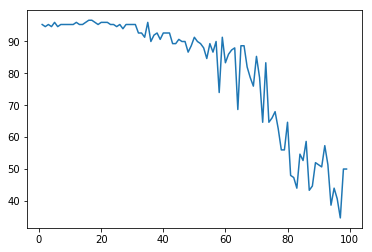

best k:  16  score:  96.6666666667


In [70]:
draw_scores(scores)
max_score = max(scores, key=operator.itemgetter(1))
print 'best k: ', max_score[0], ' score: ', max_score[1]